<a href="https://colab.research.google.com/github/GAUTAMSINGH102/Task/blob/main/Internship_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##**Dataset**
***  
Skills and Keywords  


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/skills.csv')

In [ ]:
data

,Skills,Keywords
0,Decision Making,conducted presented maintained improved distr...
1,Communication,Management public media team strategy marketi...
2,Delegate,management volunteer team leader communicatio...
3,Teamwork,team problem-solving communication collaborat...
4,Adaptability,team hackathon experience projects leader ach...
5,Problem-Solving,projects hackathon experience achievements sk...
6,Trustworthiness,Experience team leaders group hackathon proje...
7,Tech Savviness,technology code deploy built developed create...


In [ ]:
data.head()

,Skills,Keywords
0,Decision Making,conducted presented maintained improved distr...
1,Communication,Management public media team strategy marketi...
2,Delegate,management volunteer team leader communicatio...
3,Teamwork,team problem-solving communication collaborat...
4,Adaptability,team hackathon experience projects leader ach...


###**Preprocessing of Keywords**

Importing of Library

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
stemmer = SnowballStemmer('english')

Cleaning Keywords and Stroing them into new Column

In [ ]:
data['clean_keywords'] = data[' Keywords'].astype('str').apply(lambda x: str.lower(x))

In [ ]:
data['clean_keywords'] = data['clean_keywords'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [ ]:
data['clean_keywords'] = data['clean_keywords'].apply(lambda words: ' '.join(stemmer.stem(word) for word in words.split()))

In [ ]:
data.tail()

,Skills,Keywords,clean_keywords
3,Teamwork,team problem-solving communication collaborat...,team problem-solv communic collabor leader pro...
4,Adaptability,team hackathon experience projects leader ach...,team hackathon experi project leader achiev im...
5,Problem-Solving,projects hackathon experience achievements sk...,project hackathon experi achiev skill develop ...
6,Trustworthiness,Experience team leaders group hackathon proje...,experi team leader group hackathon project dev...
7,Tech Savviness,technology code deploy built developed create...,technolog code deploy built develop creat hack...


###**Visualization of Keywords**

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install --upgrade pillow==6.2.2 

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

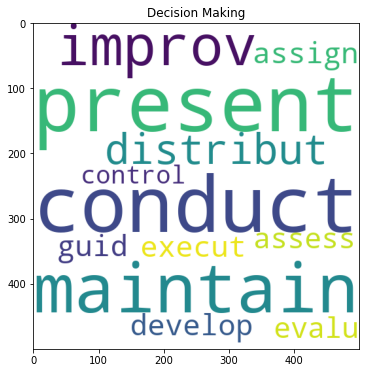

In [ ]:
keys = wc.generate(data[data['Skills'] == 'Decision Making']['clean_keywords'][0])
plt.figure(figsize=(15,6))
plt.title('Decision Making')
plt.imshow(keys)

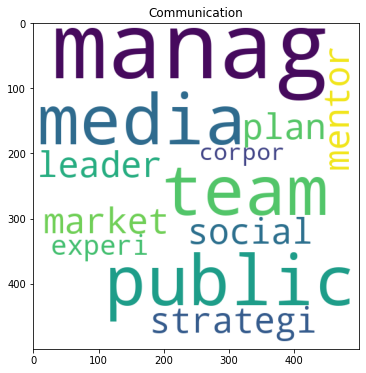

In [ ]:
keys = wc.generate(data[data['Skills'] == 'Communication']['clean_keywords'][1])
plt.figure(figsize=(15,6))
plt.title('Communication')
plt.imshow(keys)

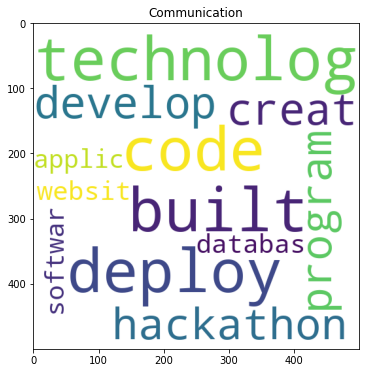

In [ ]:
keys = wc.generate(data[data['Skills'] == 'Tech Savviness']['clean_keywords'][7])
plt.figure(figsize=(15,6))
plt.title('Communication')
plt.imshow(keys)

##**Extracting Text From Resume**  
***  
Using PyPDF2

In [ ]:
!pip install pdfplumber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pdfplumber
import PyPDF2

In [ ]:
file = '/content/Viveksingh Thakur - resume.pdf'

In [ ]:
#Creating a PDF File Object
pdfFileObj = open(file, 'rb')

In [ ]:
# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [ ]:
#Get the number of pages
pages = pdfReader.numPages

In [ ]:
alltextlist = []

In [ ]:
with pdfplumber.open(file) as pdf:
 #Loop through the number of pages
    for i in range(0, pages): 
      page = pdf.pages[i]
      text = page.extract_text()
      alltextlist.append(text)

In [ ]:
alltextlist[0]

'VivekSingh Thakur\nAhmedabad,Gujarat\n(cid:129) 9978175165 ! vivek14599@gmail.com Ł LinkedIn ¥ GitHub\nEducation\nInternational Institute of Information Technology Aug. 2020 – Present\nMaster of Technology,Computer Science and Engineering CGPA: 3.35/4\nU.V Patel College of Engineering Aug. 2016 – May 2020\nBachelor of Technology,Computer Science and Engineering CGPA: 8.85/10\nMahatma Gandhi High School June. 2015 – May 2016\nHigher Secondary School Percentage: 71\nExperience\nQualcomm | Software Engineering intern Jan 2022 - till now\n• Joined as an Intern in Power Performance and Thermal team under Apps Subsystem.\n• Working on C Code related to Power usage of main core in the Chipset.\nProjects\nCube Data Management System | C++, SQL March 2021\n• Created a Data Warehouse System for Querying large volume of data efficiently using relational database.\n• The application uses pre-computed Lattice of Cuboids which improves the OLAP query processing time upto 3x for bulk\ndata.\n• Imple

In [ ]:
print(alltextlist[0])

VivekSingh Thakur
Ahmedabad,Gujarat
(cid:129) 9978175165 ! vivek14599@gmail.com Ł LinkedIn ¥ GitHub
Education
International Institute of Information Technology Aug. 2020 – Present
Master of Technology,Computer Science and Engineering CGPA: 3.35/4
U.V Patel College of Engineering Aug. 2016 – May 2020
Bachelor of Technology,Computer Science and Engineering CGPA: 8.85/10
Mahatma Gandhi High School June. 2015 – May 2016
Higher Secondary School Percentage: 71
Experience
Qualcomm | Software Engineering intern Jan 2022 - till now
• Joined as an Intern in Power Performance and Thermal team under Apps Subsystem.
• Working on C Code related to Power usage of main core in the Chipset.
Projects
Cube Data Management System | C++, SQL March 2021
• Created a Data Warehouse System for Querying large volume of data efficiently using relational database.
• The application uses pre-computed Lattice of Cuboids which improves the OLAP query processing time upto 3x for bulk
data.
• Implementation of OLAP fu

##**Cleaning the Text**

In [ ]:
text = ','.join(alltextlist)

In [ ]:
text = alltextlist[0].replace("\n", " ")
text = text.replace("|", " ")
text = text.replace(":", " ")
text = text.replace(";", " ")
text = text.replace("–", "")
text = text.replace("-", "")
text = text.replace("/", " ")
text = text.replace("•", " ")

In [ ]:
text

'VivekSingh Thakur Ahmedabad,Gujarat (cid 129) 9978175165 ! vivek14599@gmail.com Ł LinkedIn ¥ GitHub Education International Institute of Information Technology Aug. 2020  Present Master of Technology,Computer Science and Engineering CGPA  3.35 4 U.V Patel College of Engineering Aug. 2016  May 2020 Bachelor of Technology,Computer Science and Engineering CGPA  8.85 10 Mahatma Gandhi High School June. 2015  May 2016 Higher Secondary School Percentage  71 Experience Qualcomm   Software Engineering intern Jan 2022  till now   Joined as an Intern in Power Performance and Thermal team under Apps Subsystem.   Working on C Code related to Power usage of main core in the Chipset. Projects Cube Data Management System   C++, SQL March 2021   Created a Data Warehouse System for Querying large volume of data efficiently using relational database.   The application uses precomputed Lattice of Cuboids which improves the OLAP query processing time upto 3x for bulk data.   Implementation of OLAP functi

In [ ]:
text = str.lower(text)

In [ ]:
text

'viveksingh thakur ahmedabad,gujarat (cid 129) 9978175165 ! vivek14599@gmail.com ł linkedin ¥ github education international institute of information technology aug. 2020  present master of technology,computer science and engineering cgpa  3.35 4 u.v patel college of engineering aug. 2016  may 2020 bachelor of technology,computer science and engineering cgpa  8.85 10 mahatma gandhi high school june. 2015  may 2016 higher secondary school percentage  71 experience qualcomm   software engineering intern jan 2022  till now   joined as an intern in power performance and thermal team under apps subsystem.   working on c code related to power usage of main core in the chipset. projects cube data management system   c++, sql march 2021   created a data warehouse system for querying large volume of data efficiently using relational database.   the application uses precomputed lattice of cuboids which improves the olap query processing time upto 3x for bulk data.   implementation of olap functi

##**Preprocessing**
***  
Removing Stopwords  
Stemming  
Lemmetizing

In [ ]:
import string

In [ ]:
li = []
for word in text.split():
  if word not in stop and word not in string.punctuation:
    if not word.isdigit():
      li.append(word)
      # print(li)
      source = ' '.join(li)

In [ ]:
source

'viveksingh thakur ahmedabad,gujarat (cid 129) vivek14599@gmail.com ł linkedin ¥ github education international institute information technology aug. present master technology,computer science engineering cgpa 3.35 u.v patel college engineering aug. may bachelor technology,computer science engineering cgpa 8.85 mahatma gandhi high school june. may higher secondary school percentage experience qualcomm software engineering intern jan till joined intern power performance thermal team apps subsystem. working c code related power usage main core chipset. projects cube data management system c++, sql march created data warehouse system querying large volume data efficiently using relational database. application uses precomputed lattice cuboids improves olap query processing time upto 3x bulk data. implementation olap functions like slice ,dice ,rollup etc deep insights related data. implemented unique functionality, iceberg cubes faster querying better caching meets aggregate conditions. s

In [ ]:
li = []
for word in source.split():
  stemmedword = stemmer.stem(word)
  li.append(stemmedword)
  source = ' '.join(li)

In [ ]:
source

'viveksingh thakur ahmedabad,gujarat (cid 129) vivek14599@gmail.com ł linkedin ¥ github educ intern institut inform technolog aug. present master technology,comput scienc engin cgpa 3.35 u.v patel colleg engin aug. may bachelor technology,comput scienc engin cgpa 8.85 mahatma gandhi high school june. may higher secondari school percentag experi qualcomm softwar engin intern jan till join intern power perform thermal team app subsystem. work c code relat power usag main core chipset. project cube data manag system c++, sql march creat data warehous system queri larg volum data effici use relat database. applic use precomput lattic cuboid improv olap queri process time upto 3x bulk data. implement olap function like slice ,dice ,rollup etc deep insight relat data. implement uniqu functionality, iceberg cube faster queri better cach meet aggreg conditions. student communtiy hub java, angular js, git, docker, jenkins, ansible, springboot april develop fullstack project provid student platf

In [ ]:
keys = wc.generate(source)

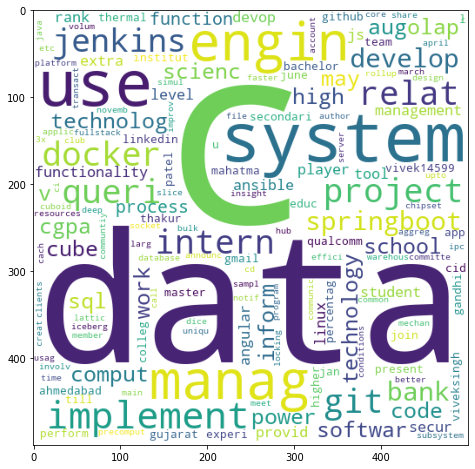

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(keys)

In [ ]:
resumeWord = []
for word in source.split():
  resumeWord.append(word)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


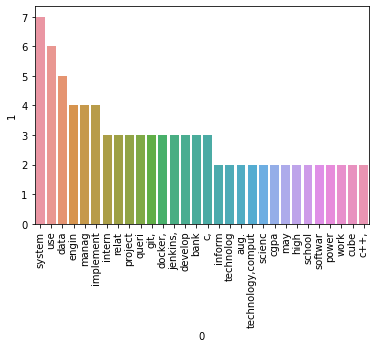

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(resumeWord).most_common(30))[0],pd.DataFrame(Counter(resumeWord).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#**Two Methods for Tokenization**
***  
**Sentence Transformer**  
**TFIDF Vectorizer**  

##**Method-1**
***  
**Sentence Transformer**

In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
sentence_embeddings = model.encode(combine)

In [ ]:
sentence_embeddings.shape

(9, 768)

In [ ]:
source_embedding = model.encode(source)

In [ ]:
source_embedding.shape

(768,)

##**Calculating Score**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similar_matrix = cosine_similarity(
    [source_embedding],
    sentence_embeddings[:]
)

In [ ]:
similar_matrix[0]

array([0.89814746, 0.51781845, 0.51782167, 0.61760014, 0.5456385 ,
       0.5941341 , 0.57002693, 0.54360646, 0.63041466], dtype=float32)

In [ ]:
similar_ix = np.argsort(similar_matrix[0])[::-1]

In [ ]:
similar_ix

array([0, 8, 3, 5, 6, 4, 7, 2, 1])

In [ ]:
similar_matrix[0][similar_ix]

array([0.89814746, 0.63041466, 0.61760014, 0.5941341 , 0.57002693,
       0.5456385 , 0.54360646, 0.51782167, 0.51781845], dtype=float32)

In [ ]:
for ix in similar_ix[1:]:
  print (f'Document: {data.iloc[ix-1]["Skills"]}')
  print (f'Cosine Similarity : {similar_matrix[0][ix]}')
  print("\n")

Document: Tech Savviness
Cosine Similarity : 0.6304146647453308


Document: Delegate
Cosine Similarity : 0.61760014295578


Document: Adaptability
Cosine Similarity : 0.5941340923309326


Document: Problem-Solving
Cosine Similarity : 0.5700269341468811


Document: Teamwork
Cosine Similarity : 0.5456385016441345


Document: Trustworthiness
Cosine Similarity : 0.5436064600944519


Document: Communication
Cosine Similarity : 0.5178216695785522


Document: Decision Making
Cosine Similarity : 0.5178184509277344




In [ ]:
per = (similar_matrix[0][1:]).tolist()

In [ ]:
for i in range(0, len(per)):
  per[i] = per[i] * 100

In [ ]:
per

[51.78184509277344,
 51.782166957855225,
 61.760014295578,
 54.56385016441345,
 59.41340923309326,
 57.00269341468811,
 54.36064600944519,
 63.04146647453308]

In [ ]:
skill = data['Skills'].tolist()

In [ ]:
skill

['Decision Making',
 'Communication',
 'Delegate',
 'Teamwork',
 'Adaptability',
 'Problem-Solving',
 'Trustworthiness',
 'Tech Savviness']

In [ ]:
newValue = {'Skills': skill,
            'Percentage': per}

In [ ]:
newData = pd.DataFrame(newValue)

In [ ]:
newData

,Skills,Percentage
0,Decision Making,51.781845
1,Communication,51.782167
2,Delegate,61.760014
3,Teamwork,54.563850
4,Adaptability,59.413409
5,Problem-Solving,57.002693
6,Trustworthiness,54.360646
7,Tech Savviness,63.041466


##**Method-2**
***  
**Tokenization Using TFIDF Vector**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
combine = []
combine.append(source)

In [ ]:
for i in data['clean_keywords']:
  combine.append(i)

In [ ]:
for i in combine:
  print(i)

viveksingh thakur ahmedabad,gujarat (cid 129) vivek14599@gmail.com ł linkedin ¥ github educ intern institut inform technolog aug. present master technology,comput scienc engin cgpa 3.35 u.v patel colleg engin aug. may bachelor technology,comput scienc engin cgpa 8.85 mahatma gandhi high school june. may higher secondari school percentag experi qualcomm softwar engin intern jan till join intern power perform thermal team app subsystem. work c code relat power usag main core chipset. project cube data manag system c++, sql march creat data warehous system queri larg volum data effici use relat database. applic use precomput lattic cuboid improv olap queri process time upto 3x bulk data. implement olap function like slice ,dice ,rollup etc deep insight relat data. implement uniqu functionality, iceberg cube faster queri better cach meet aggreg conditions. student communtiy hub java, angular js, git, docker, jenkins, ansible, springboot april develop fullstack project provid student platfo

In [ ]:
embeddings = vectorizer.fit_transform(combine)

In [ ]:
embeddings.shape

(9, 247)

##**Score Calculate**

In [ ]:
cosine_similarities = cosine_similarity(embeddings, embeddings)

In [ ]:
cosine_similarities[0]

array([1.        , 0.03306781, 0.05291837, 0.06346804, 0.05593853,
       0.03301919, 0.10871573, 0.0711737 , 0.1199939 ])

In [ ]:
for i in range(0, len(cosine_similarities)):
  cosine_similarities[i] = cosine_similarities[i] * 1000

In [ ]:
cosine_similarities[0][1:]

array([ 33.06781398,  52.91836556,  63.46803749,  55.93853243,
        33.01919242, 108.7157259 ,  71.17369565, 119.99390262])

In [ ]:
for i in range(1, len(cosine_similarities[0][1:])+1):
  com = cosine_similarities[0][i]
  if(com > float(100)):
    cosine_similarities[0][i] = float(100)

In [ ]:
cosine_similarities[0][1:]

array([ 33.06781398,  52.91836556,  63.46803749,  55.93853243,
        33.01919242, 100.        ,  71.17369565, 100.        ])

In [ ]:
per = (cosine_similarities[0][1:]).tolist()

In [ ]:
per

[33.067813978068585,
 52.918365562794726,
 63.46803749369531,
 55.93853242899542,
 33.01919241821871,
 100.0,
 71.17369565303682,
 100.0]

In [ ]:
skill = data['Skills'].tolist()

In [ ]:
skill

['Decision Making',
 'Communication',
 'Delegate',
 'Teamwork',
 'Adaptability',
 'Problem-Solving',
 'Trustworthiness',
 'Tech Savviness']

In [ ]:
newValue = {'Skills': skill,
            'Percentage': per}

In [ ]:
newData = pd.DataFrame(newValue)

In [ ]:
newData

,Skills,Percentage
0,Decision Making,33.067814
1,Communication,52.918366
2,Delegate,63.468037
3,Teamwork,55.938532
4,Adaptability,33.019192
5,Problem-Solving,100.000000
6,Trustworthiness,71.173696
7,Tech Savviness,100.000000


##**EXXTRAA**

##**Keywords Extraction From Resume**

In [ ]:
!pip install multi_rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from multi_rake import Rake

In [ ]:
rake = Rake()

In [ ]:
keywords = rake.apply(source)

In [ ]:
for i in keywords[:5]:
  print(i)

('viveksingh thakur ahmedabad', 9.0)
('implement olap function', 9.0)
('implement uniqu functionality', 9.0)
('present master technology', 8.5)
('bank manag system', 8.5)
